# Introduction

#### For this project, I choosed the used_cars_data.csv dataset which contains information on used cars.

Our objective is to predict the used car prices for dealer based on the various features of a car like fuel type, year, kms_driven, seller_type, etc. Our aim is also to help the seller to estimate the best selling price of the used car. In this notebook, we will describe our Machine Learning approach to predict the price of a used car.

The columns in the given dataset are as follows:

- Car_Name: Name of the cars

- Year: Year of the car when it was bought.

- Selling_Price: This column should be filled with the price the owner wants to sell the car at.

- Present_Price: This is the current ex-showroom price of the car.

- km_driven: Number of Kilometeres the car is driven.

- Fuel: Fuel type of car(petrol/diesel/CNG)

- Seller_Type: Tells if a Seller is Individual or a Dealer

- Transmission: Defines whether the car is manual or automatic.

- Owner: Defines the number of owners the car has previously had.

Different features used in the dataset are as follows:

##### Input Features: Car_Name, Year, Present_Price, Kms_Driven, Fuel, Seller_Type, Transmission, Owner.
##### Output Feature: Selling_Price (to be predicted)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor, RandomForestRegressor

import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading data
df_cars = pd.read_csv('used_cars_data.csv')
df_cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checks datashape

print(f'There are {df_cars.shape[0]} rows and {df_cars.shape[1]} columns')

There are 301 rows and 9 columns


As we can see, the Dataset consists of 301 Rows and 9 Columns.

Column “Price” being our Target Variable(Y) and 8 columns like Fuel_type, Year, Kms_Driven etc which give information about various attributes of the car.

# Data Preprocessing and EDA

In [5]:
# summary stats

df_cars.describe(include='all')
# using include all for getting categorical column also.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


Will touch basic part, from above table we can see total car_name count is 301, with 98 unique cars name. If we convert it on dummy variable, the dimensions of our data will be very high, as it will increase 98 more columns into our data. Later on I will decide if I want to keep car name columns or to drop it. Also, top carname is city means it is the most occurring carname in the dataset, we can see it occured 26 times. 

Here, NAN means it is continous data so it cannot perform unique or top values.

Also, another assumption I have made that it is second hand or old car price dataset, so when the car gets old I dont think car name puts so much value while predicting price. It would have different case if was something like brand name. So, will drop Car_Name column from the dataset later on.

In [6]:
# Details about Dataframe index, Column Name, Non-null Count, and Datatype of the column 

df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# check missing or null values
df_cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

The dataset contained no null values, but there might be duplicate values. So checking that as well:

##### Removing redundant values

In [8]:
print("Count before removing duplicate rows: ", df_cars.shape)
before_duplicates_drop = df_cars.duplicated().sum()
print("Total duplicate rows: ", before_duplicates_drop)
dataset = df_cars.drop_duplicates()
print("Count after removing duplicate rows ", dataset.shape)

Count before removing duplicate rows:  (301, 9)
Total duplicate rows:  2
Count after removing duplicate rows  (299, 9)


After dropping duplicate samples, the size of dataset reduced to 299 from 301

In [9]:
# Trying to find how many unique values are there in categorical features.

print(df_cars['Fuel_Type'].unique())
print(df_cars['Seller_Type'].unique())
print(df_cars['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [10]:
# Identify variables with only three unique values
binary_vars = [col for col in df_cars.columns if df_cars[col].nunique() <=3]

# Display the number of occurrences of unique values for binary variables
for col in binary_vars:
    value_counts = df_cars[col].value_counts()
    print(f"{col}:\n{value_counts}\n")

Fuel_Type:
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Seller_Type:
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Transmission:
Manual       261
Automatic     40
Name: Transmission, dtype: int64

Owner:
0    290
1     10
3      1
Name: Owner, dtype: int64



In [12]:
df_cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

###### Exploring Probability Distributions (PDF)

In this step visualization is done to check the skewedness of the features that whether they normally
distributed or not.

Text(0.5, 1.0, 'Car Present Price Distribution')

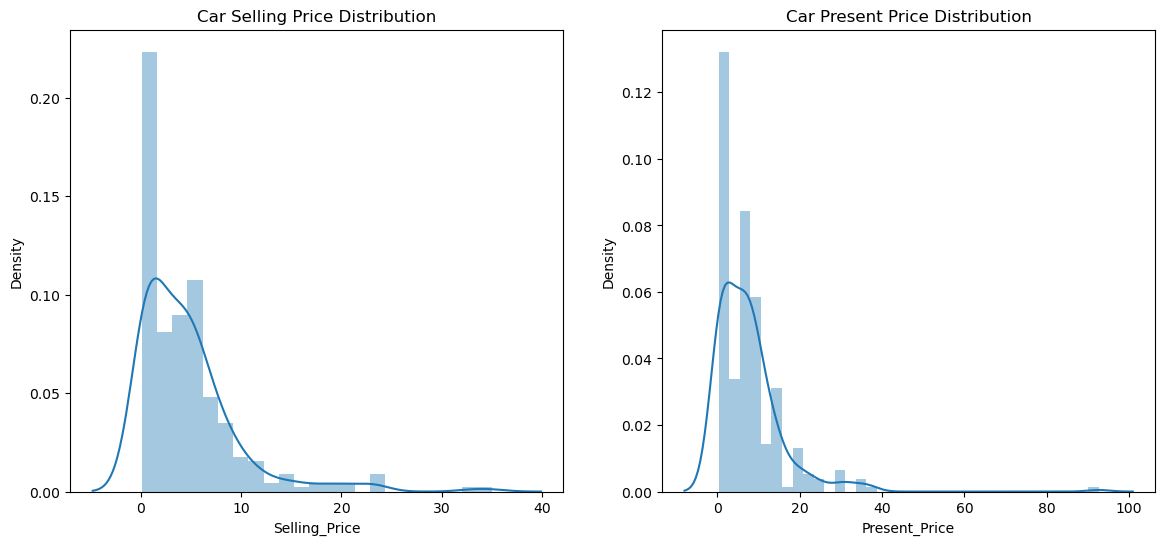

In [13]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.distplot(df_cars['Selling_Price'])
plt.title('Car Selling Price Distribution')


plt.subplot(1,2,2)
sns.distplot(df_cars['Present_Price'])
plt.title('Car Present Price Distribution')


- If we check the price range, the values are right skewed also there are some outliars.
- Observed from figure, most of the selling_price lies between 1-10 and present_price lies from - 40.

<Axes: xlabel='Year', ylabel='Density'>

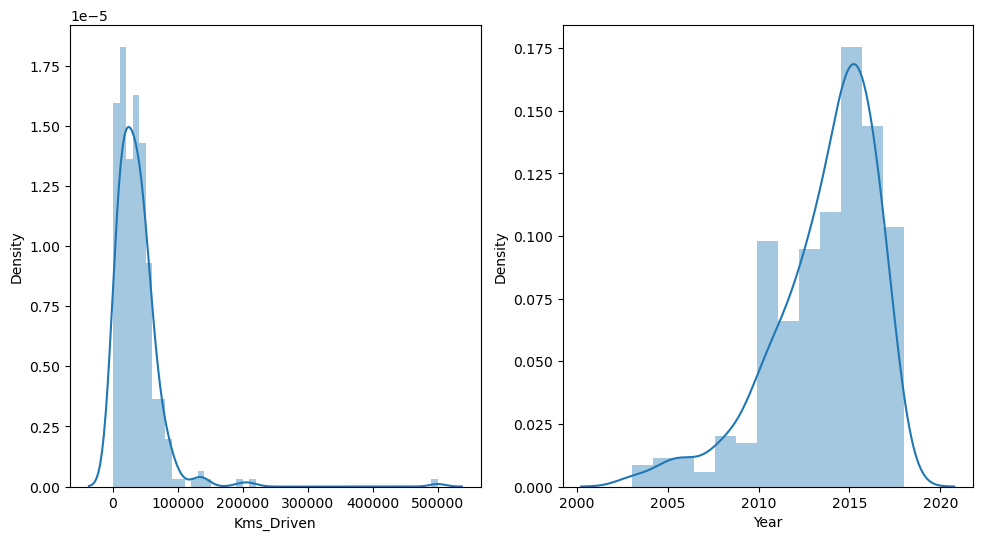

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.distplot(df_cars['Kms_Driven'])

plt.subplot(1,3,2)
sns.distplot(df_cars['Year'])

- If we check the kms_driven, the values are right skewed also there are some outliers as we can see that there is a car which is above the 300,000 miles driven.


- Observed from figure, most of the kms_driven falls under 100000 lies between 1-10 and present_price lies from - 40.

- For year column, it is right-skewed which means that most of the data lies in the range of 2004-2020.

- Most new cars are newer like after 2010, but there are few cars which is older than 2005. Since, I notice the Year column is treated like other numerical column not datetype.

###### Dealing with Outliers

Though we know that there are no NA values/records in the data set. Still, it doesn't mean that the data doesn't contain noisy data points. So, removing outliers becomes very much necessary. So with the help of distplot, outlier detection was done.

The one way is to do that is getting 99% of total data and removing 1% data. For that I will use pandas .quantile() method.
I will perform outliars step by step on necessary columns.

In [15]:
# on selling price columns 
q = df_cars['Selling_Price'].quantile(q=0.99) 
final_dataset = df_cars[df_cars['Selling_Price']<q]
final_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,295.000000,295.000000,295.000000,295.000000,295.000000
mean,2013.603390,4.212034,6.931424,36932.572881,0.044068
std,2.896512,3.957087,6.404779,39140.963596,0.250354
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.790000,1.185000,15000.000000,0.000000
50%,2014.000000,3.500000,5.980000,32000.000000,0.000000
75%,2016.000000,5.925000,9.400000,48883.500000,0.000000
max,2018.000000,20.750000,35.960000,500000.000000,3.000000


Now, if we compare from above descriptive then we can see the price max value has been relaxed, but it's also very far from its mean, but it is acceptable.

Text(0.5, 1.0, 'After Removing Outliers')

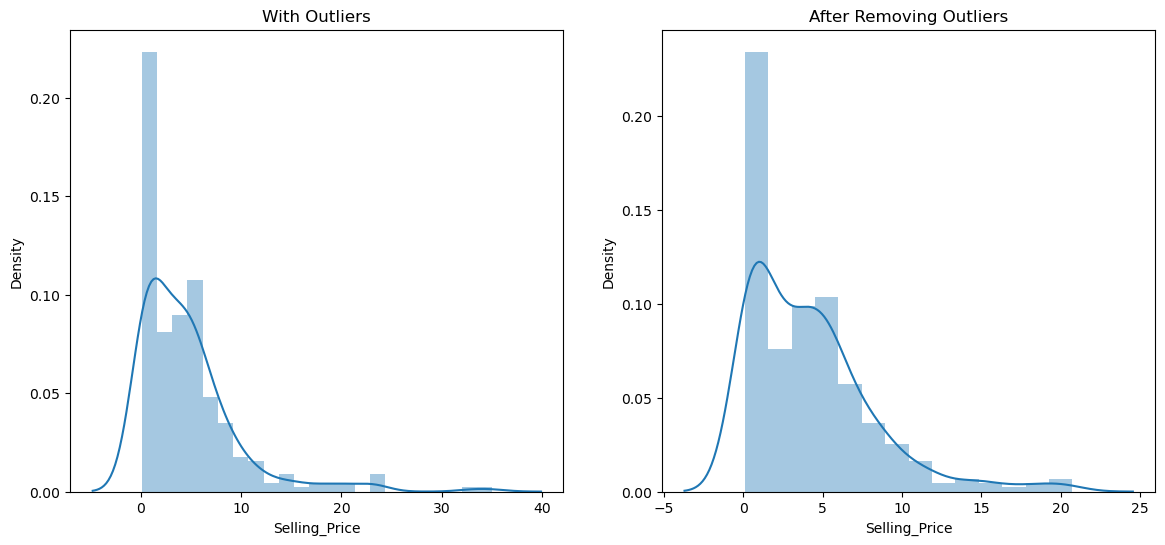

In [16]:
plt.figure(figsize=(14,6))

# plotting distribution graph with seaborn
# plotting the Target column prices

plt.subplot(1,2,1)
sns.distplot(df_cars['Selling_Price'])
plt.title('With Outliers')


plt.subplot(1,2,2)
sns.distplot(final_dataset['Selling_Price'])
plt.title('After Removing Outliers')

Now the outliars are far away, now we can see the price is more generalized way.

We noticed similar right skewed with other columns like Kms_driven, Year, Present_Price.
First, I will go with Present_Price

I will perform the same processing here for Present_Price, keeping only 99% data.

In [17]:
# Present_Price

q = final_dataset['Present_Price'].quantile(q=0.99) 
final_dataset = final_dataset[final_dataset['Present_Price']<q]

Text(0.5, 1.0, 'After Removing Outliers')

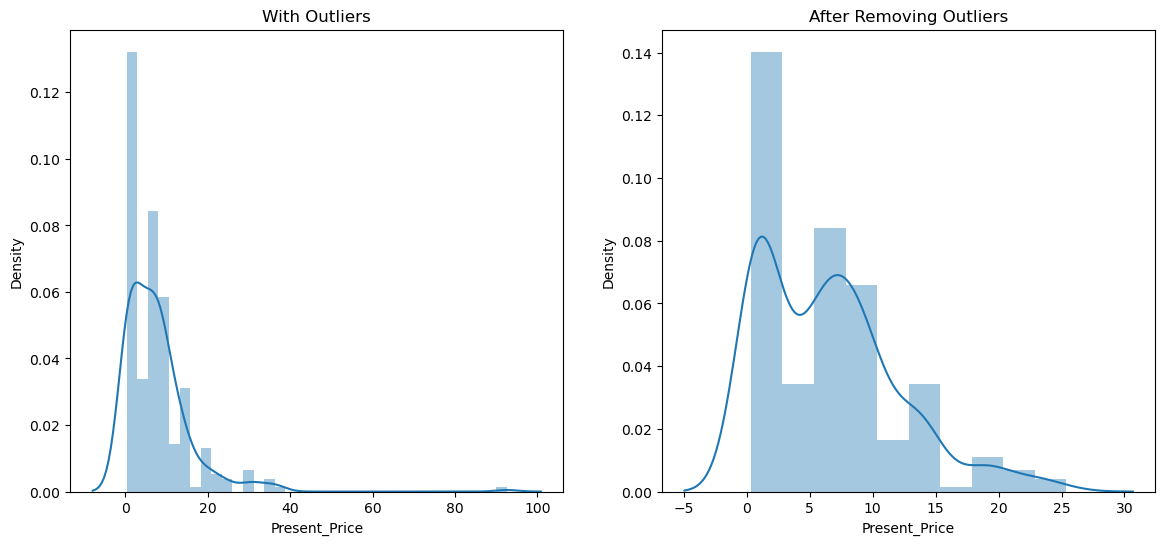

In [18]:
plt.figure(figsize=(14,6))

# plotting distribution graph with seaborn
# plotting the Target column prices

plt.subplot(1,2,1)
sns.distplot(df_cars['Present_Price'])
plt.title('With Outliers')


plt.subplot(1,2,2)
sns.distplot(final_dataset['Present_Price'])
plt.title('After Removing Outliers')

- Before outlier we can see, Present_Price column it is right-skewed and contains mostly noisy daat mostly around 100.
- This is an outlier hence removed it by keeping the range of data points for Present_Price upto 30 only.


I will perform the same processing here for kms_driven, keeping only 99% data.

In [19]:
q = final_dataset['Kms_Driven'].quantile(q=0.99) 
q

148069.36000000074

In [20]:
# Kms_driven

#q = final_dataset['Kms_Driven'].quantile(q=0.99) 
final_dataset = final_dataset[final_dataset['Kms_Driven']<450000]

Text(0.5, 1.0, 'After Removing Outliars')

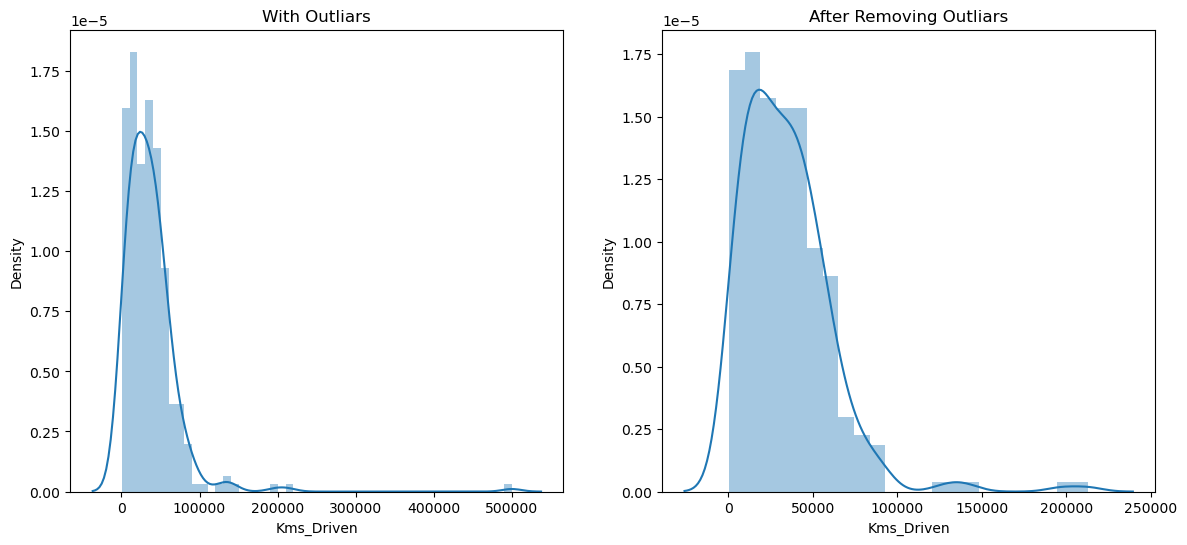

In [21]:
plt.figure(figsize=(14,6))

# plotting distribution graph with seaborn
# plotting the Target column prices

plt.subplot(1,2,1)
sns.distplot(df_cars['Kms_Driven'])
plt.title('With Outliers')


plt.subplot(1,2,2)
sns.distplot(final_dataset['Kms_Driven'])
plt.title('After Removing Outliers')

- After removing outliars, right skewed data has reduced as we can observed from above fig.
- Mostly car's km_driven is around 20000-50000

For Year feature, the problem is opposite, the most new cars are newer like after 2005, but there are few cars which is older than 2005. So here we will keep only 1% data and remove the 99th percentile

In [22]:
# this time I will keep only 1% data and remove the 99th percentile/

q = final_dataset['Year'].quantile(q=0.01)
final_dataset = final_dataset[final_dataset['Year']>q] # removing the 1th percentile data.
final_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


From above table we can see index is little messed up. It is because we have remove some rows from the data but the index is showing from the raw data that is why the last index value is not matching with total number of rows.

In [23]:
# reset indexes

car_clean = final_dataset.reset_index(drop=True)

car_clean

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
281,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
282,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
283,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
284,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Feature scaling

In [24]:
car_clean.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

There's a feature called Year. Whenever we have this kind of feature like Year, there must be car around 2014, 2010, or 1016. From the data as we know, one of the car is from 2005 which means deprecation of car is also going on, so we will do is by using the Year feature we will calculate how old this car is by creating the new derived features that is Years_Old_Car. We can create number of years by just doing minus from current year and car bought year.

In [25]:
final_carset = car_clean[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
                         'Seller_Type', 'Transmission', 'Owner']]

##### Excuding car name as I think this feature doesnot put much valuable information because it might have too many values.

I have already cleared this point on top, as its categorical data and encoding results to adding more dimension i.e each unique value will get added to columns if I apply hot-encoding. So, I thought its better to remove car_name feature.

In [26]:
#creating feature called Current Year and called 2023
final_carset['Current_Year'] = 2023
final_carset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [27]:
final_carset['Years_Old_Car'] = final_carset['Current_Year'] - final_carset['Year']
final_carset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Years_Old_Car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


Here, created derived feature, looking at final dataset, I dont think it will require all features, so dropping Year, because I have already calculated. It's not required, so dropping those.

In [28]:
final_carset.drop(['Year'], axis=1, inplace=True)
final_carset.drop(['Current_Year'], axis=1, inplace=True)

In [29]:
final_carset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...
281,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
282,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
283,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
284,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


## Data Visualisations

##### Visualizing Data with Target Variable

In [30]:
# total cars counts based on Year wise

year=pd.DataFrame(final_carset["Years_Old_Car"].value_counts().sort_values(ascending=False).reset_index().rename(columns={"index":"Years_Old_Car","Years_Old_Car":"Count"}))

year

,Years_Old_Car,Count
0,8,58
1,7,50
2,9,36
3,6,33
4,10,32
5,11,21
6,12,19
7,13,14
8,14,6
9,15,6


##### Showing Selling Price of cars based on the Number of Years old

Text(0.5, 1.0, 'Showing Selling Price of cars based on the Number of Years old')

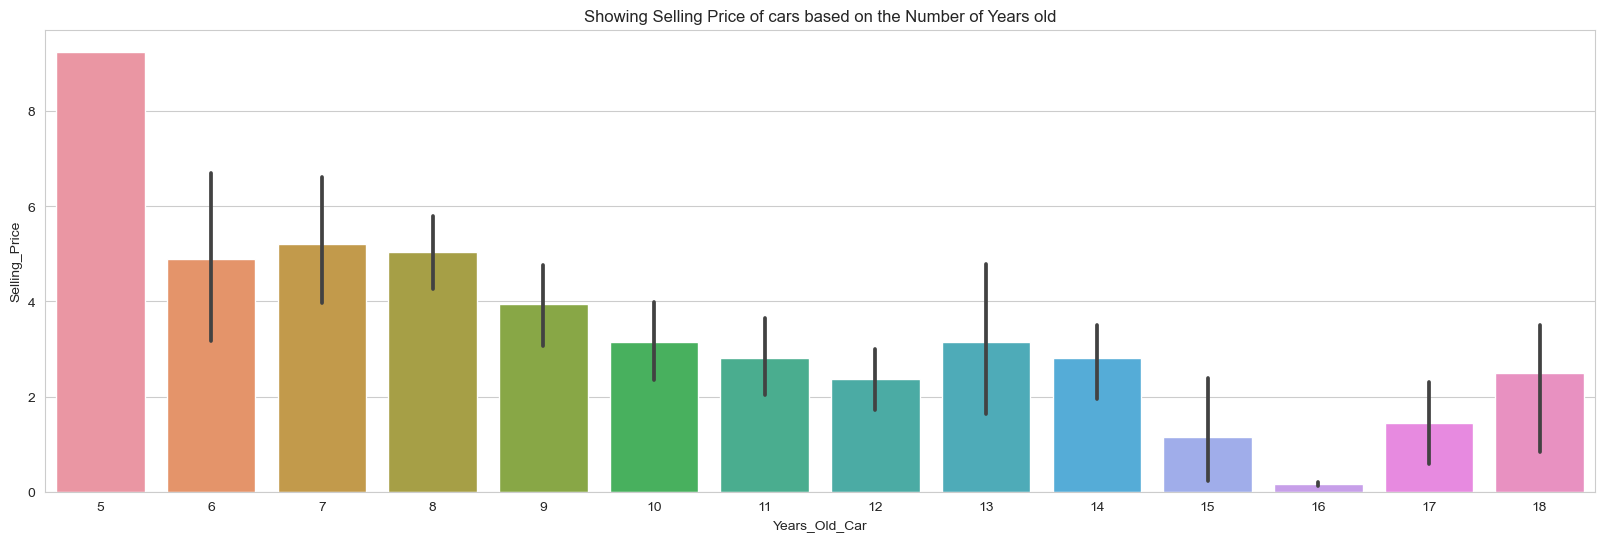

In [31]:
# Selling price based on Year wise
sns.set_style("whitegrid")

plt.figure(figsize=(20,6))
sns.barplot(x=final_carset.Years_Old_Car, y=final_carset.Selling_Price)
plt.title("Showing Selling Price of cars based on the Number of Years old")

 - From above observation it can be concluded that the cars used for lesser number of years generally have a higher selling price as compared to the cars used for greater number of years.
 
- By this plot we can see that the cars which are relatively new are having higher prices which is obvious because lesser distance the cars have travelled. But we can see that there are some deviations or differences in prices of the car which are like 13-14 years old. The Seller have tried to maximize their profit by selling it with higher price than 11 or 12 years old car.


##### Used Car Selling Price based on the Fuel Type

Text(0.5, 1.0, 'Car Selling Price based on the Fuel Type')

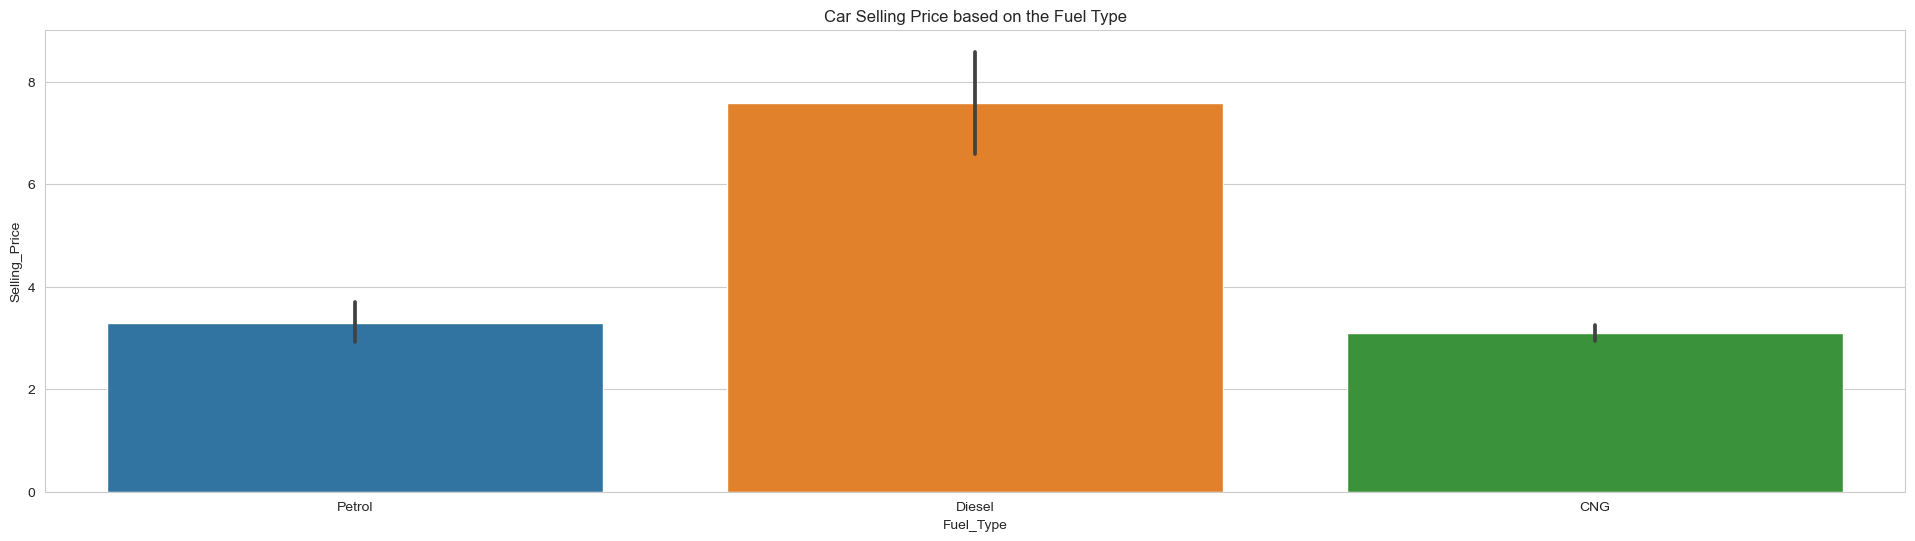

In [32]:
plt.figure(figsize=(24,6))
sns.barplot(x=final_carset.Fuel_Type, y=final_carset.Selling_Price)
plt.title("Car Selling Price based on the Fuel Type")

- From above figure, it can be concluded that used cars with Diesel as fuel type have higher selling price as compared to those which have Petrol and CNG as fuel type.

##### Used Car Selling Price based on the Transmission

Text(0.5, 1.0, 'Car Selling Price based on the Fuel Type')

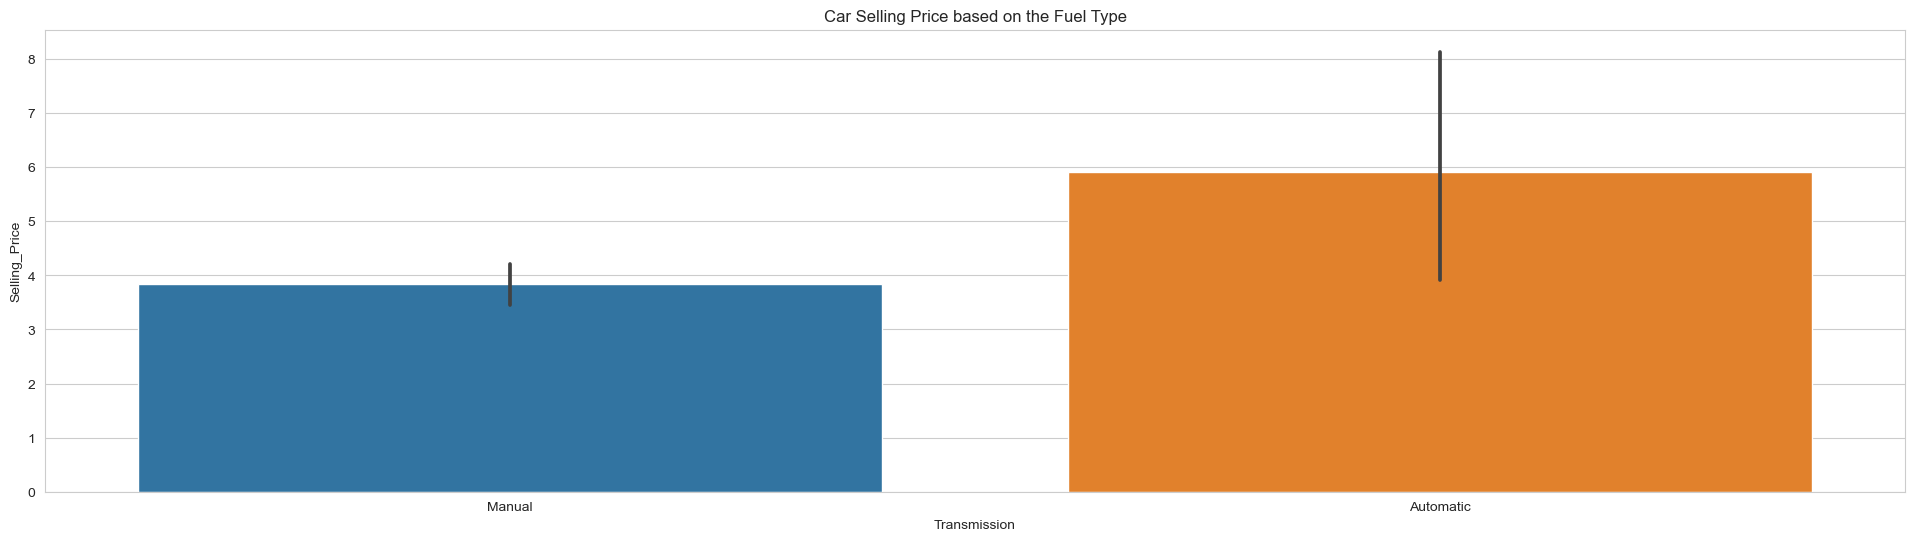

In [33]:
plt.figure(figsize=(24,6))
sns.barplot(x=final_carset.Transmission, y=final_carset.Selling_Price)
plt.title("Car Selling Price based on the Fuel Type")

- Above barplot tells us the fact that selling price of the cars with manual transmission is lower than those cars which are having automatic transmission.

#### Used Car Selling Price based on the Seller_Type

Text(0.5, 1.0, 'Car Selling Price based on the Seller Type')

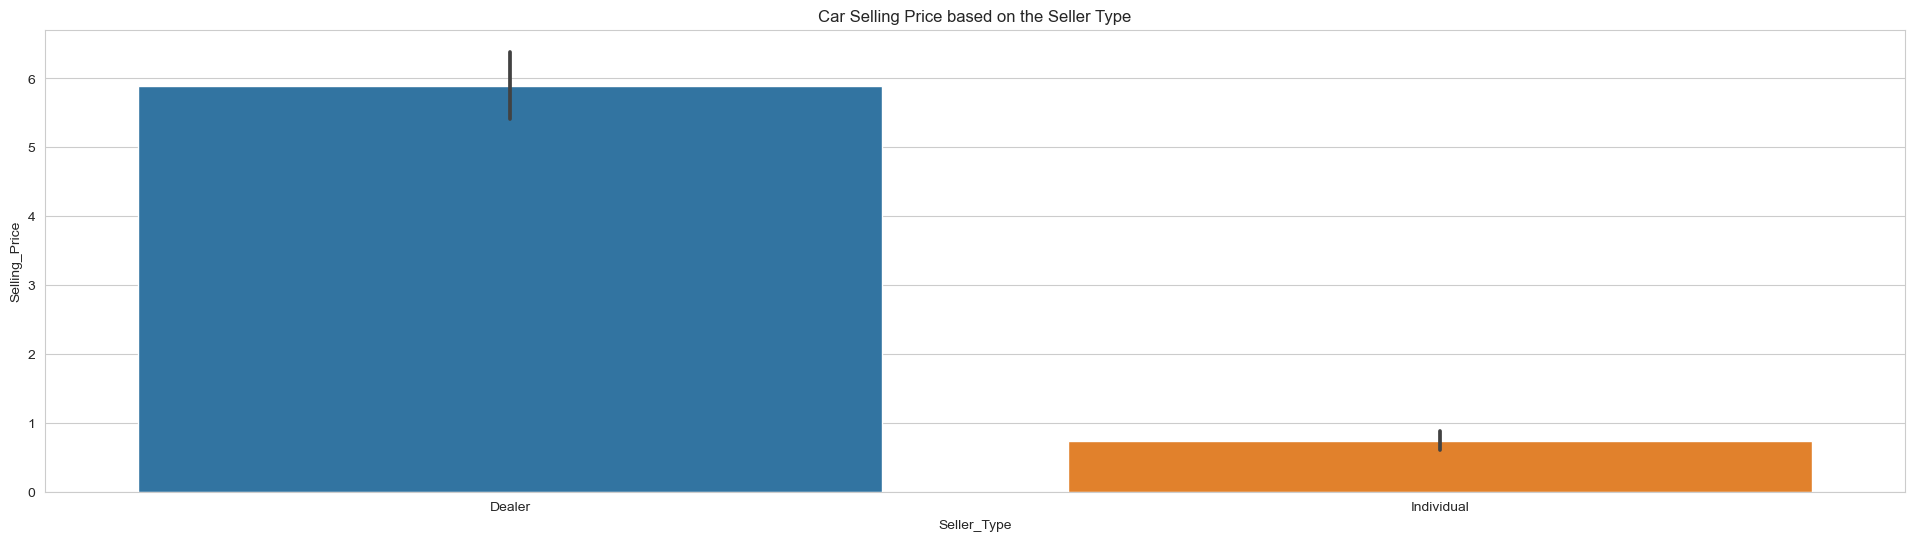

In [34]:
plt.figure(figsize=(24,6))
sns.barplot(x=final_carset.Seller_Type, y=final_carset.Selling_Price)
plt.title("Car Selling Price based on the Seller Type")

- From figure, we can come to the conclusion that used cars have a higher selling price when sold by dealers in
comparison to being sold by individuals.

#### Used Car Selling Price based on the Owner.

Text(0.5, 1.0, 'Car Selling Price based on the Owner')

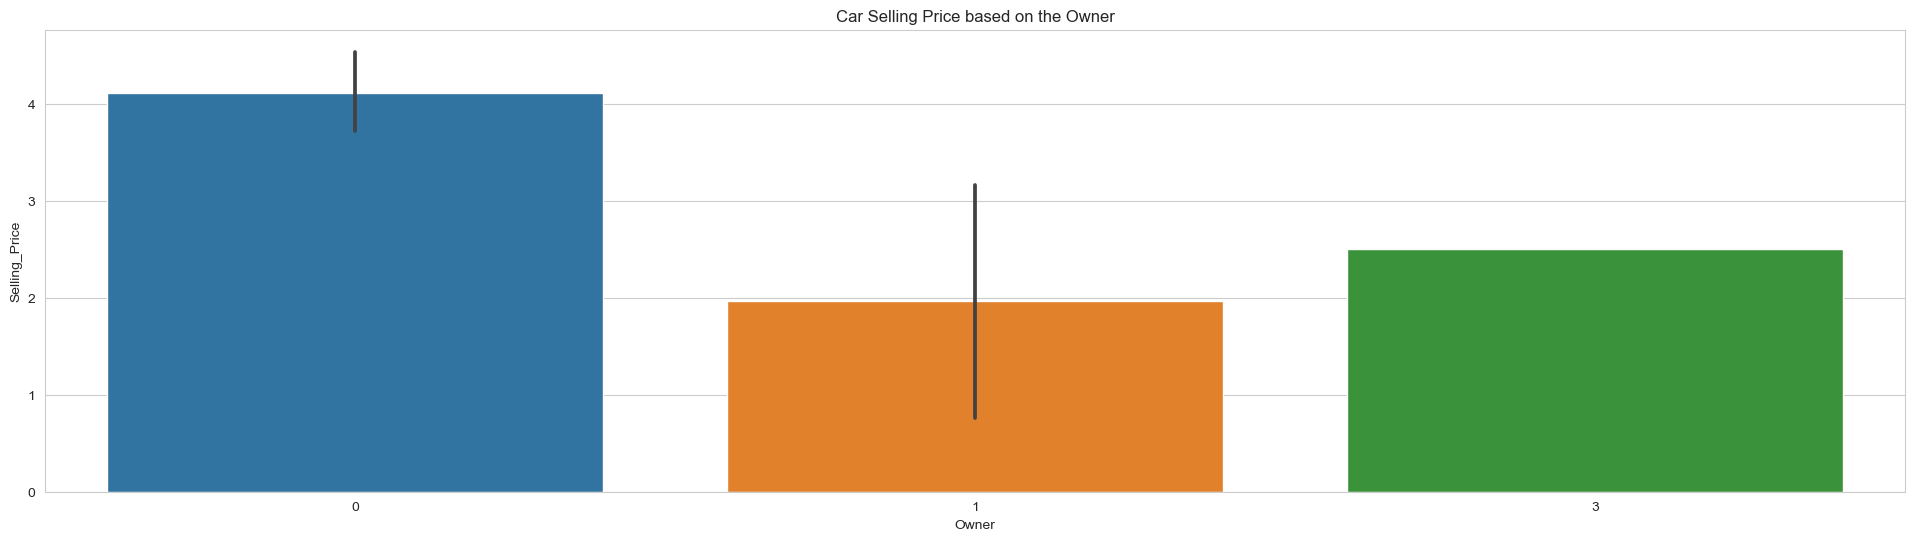

In [35]:
# comparing owner with respect to selling price, this helps to know whether having more owner affects selling price also to 
#find out which owner type has more price.


plt.figure(figsize=(24,6))
sns.barplot(x=final_carset.Owner, y=final_carset.Selling_Price)
plt.title("Car Selling Price based on the Owner")

- Above figure clarifies that the selling price of cars with no previous owners is higher than rest of the cars.

##### Used Car Selling Price based on the Kms_Driven

Text(0.5, 1.0, 'Car Selling Price based on the Kms_Driven')

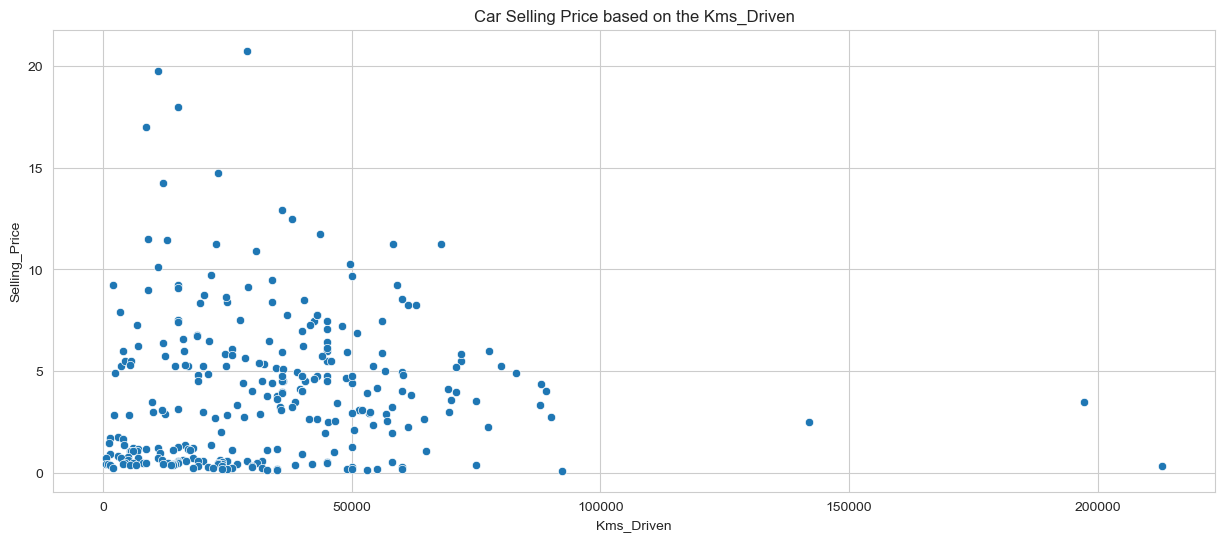

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=final_carset.Kms_Driven, y=final_carset.Selling_Price)
plt.title("Car Selling Price based on the Kms_Driven")

- From above scatterplot it can be concluded that data points are mixed, it clearly doesnot say that selling_price gets higher if car has lower kms_driven. Well there are few data points that can see lesser the kms_driven, higher the selling price. So, I think there might be other factors as well for selling price.

##### Used Car Selling Price based on the Present Price

Text(0.5, 1.0, 'Car Selling Price based on the Kms_Driven')

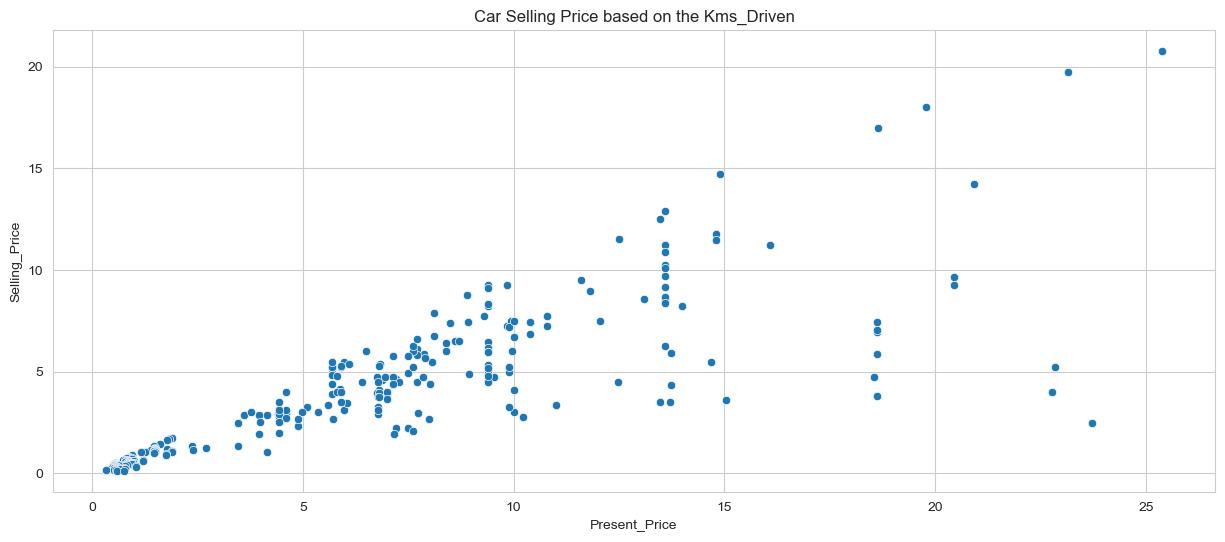

In [37]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=final_carset.Present_Price, y=final_carset.Selling_Price)
plt.title("Car Selling Price based on the Kms_Driven")

- When car actual present price is higher then it seems selling price also depend on the present price as it would increase the selling price and thus depicts that a greater present price of the car would also result in a greater selling price of the used car.

##### Few more EDA

###### Show Top 10 Most Expensive Car_Name by Selling Price

In [38]:
n=df_cars[["Car_Name", 'Present_Price', "Selling_Price"]].sort_values(by="Selling_Price",ascending=False).head(10)
n

,Car_Name,Present_Price,Selling_Price
86,land cruiser,92.60,35.00
64,fortuner,36.23,33.00
63,fortuner,35.96,23.50
82,innova,25.39,23.00
51,fortuner,30.61,23.00
93,fortuner,30.61,23.00
96,innova,25.39,20.75
59,fortuner,35.96,19.99
66,innova,23.15,19.75
62,fortuner,35.96,18.75


We can see these car names have the highest selling price.

In [39]:
# Fuel_Type total

fuel=pd.DataFrame(final_carset["Fuel_Type"].value_counts().reset_index().rename(columns={"index":"Fuel_type","Fuel_Type":"Total"}))

In [40]:
fuel

,Fuel_type,Total
0,Petrol,235
1,Diesel,49
2,CNG,2


- This table shows us that there are around 217 cars which are of Petrol. Arounf 48 cars which are Diesel type and 2 counts as CNG fuel type in overall.

<Axes: xlabel='Transmission', ylabel='count'>

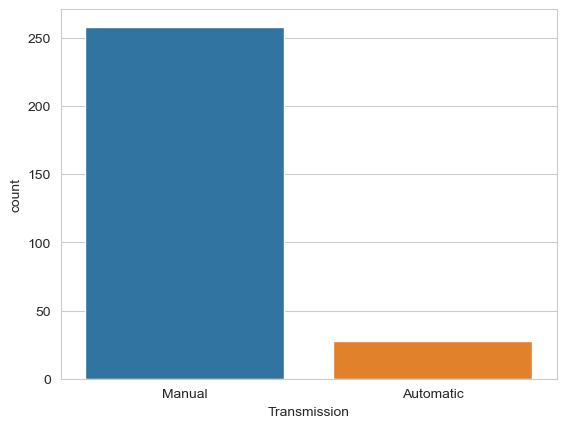

In [41]:
# Transmission count

transmission_count=pd.DataFrame(final_carset["Transmission"].value_counts().reset_index().rename(columns={"index":"Transmission","Transmission":"Total"}))
transmission_count
sns.countplot(data=final_carset, x='Transmission')

- In overall Manual Transmission count is higher than automatic type in the dataset.

##### Average price of vehicles by fuel type and transmission

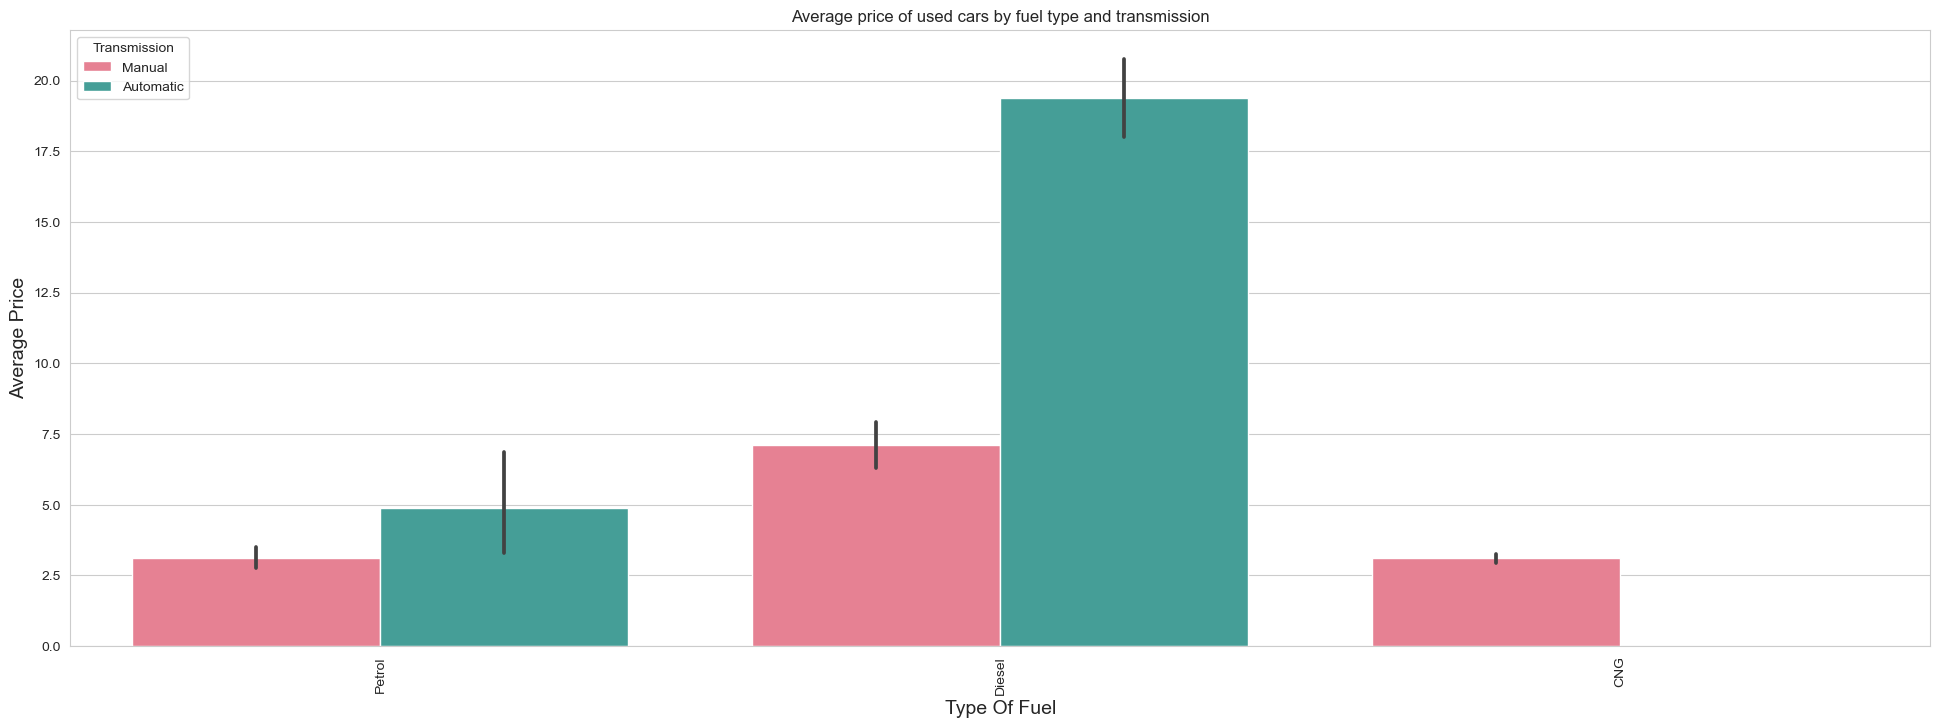

In [42]:
fig, ax = plt.subplots(figsize=(24,8))

sns.barplot(x="Fuel_Type", y="Selling_Price", hue= "Transmission", palette="husl",data=final_carset)
ax.set_title("Average price of used cars by fuel type and transmission",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

- This boxplot confirms that prices are generally higher for automatic transmissions than for manuals, and also higher for Diesel cars than petrol. However there is more dispersion for automatic and Diesel than for manual and petrol, probably due to their lower count in the data.

- This plot confirms that for Diesel cars are more expensive (not a great surprise considering that modern Diesel powertrains are usually more technologically advanced, this could be the reason.


##### Kms_Driven based on Years Old Car

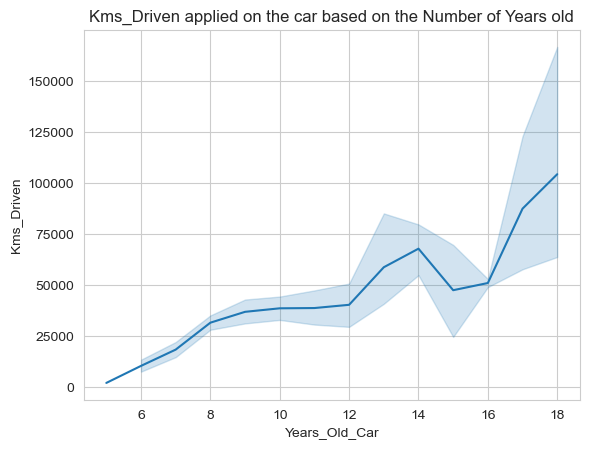

In [43]:
sns.lineplot(x = "Years_Old_Car", y = "Kms_Driven", data = final_carset)
plt.title("Kms_Driven applied on the car based on the Number of Years old")
plt.show()

#### Price according to Years_Old_Car and Transmission

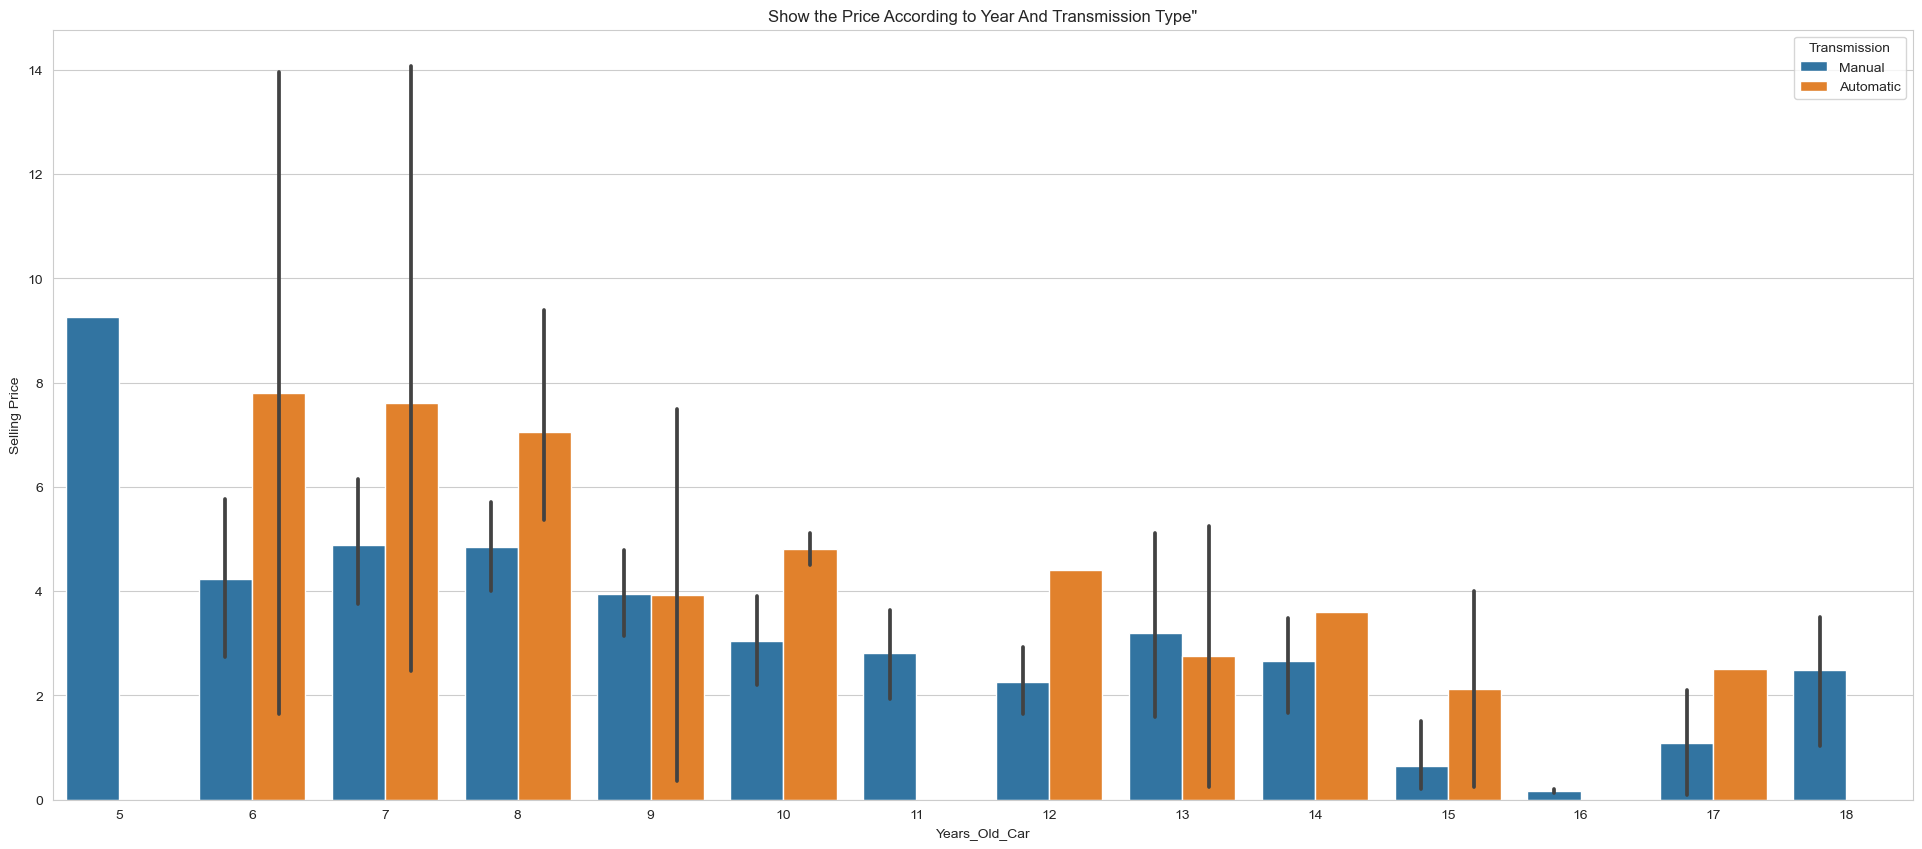

In [44]:
# Price Year wise and Transmission.
plt.figure(figsize=(24,10))
sns.barplot(x='Years_Old_Car', y='Selling_Price', hue='Transmission', data=final_carset)
plt.title('Show the Price According to Year And Transmission Type"')
plt.ylabel('Selling Price')
plt.xlabel('Years_Old_Car')
plt.show()

- This boxplot confirms that selling prices are generally higher for automatic transmission than for manual.
- Also, "New" cars are more expensive than "Old" cars, and Automatic cars are more costly.

##### Show the highest kms_driven of each car_name

In [45]:
highest_kms=df_cars.groupby(["Car_Name"])["Kms_Driven", "Selling_Price", "Present_Price"].max().sort_values(by="Kms_Driven",ascending=False).reset_index().head(10)
highest_kms

,Car_Name,Kms_Driven,Selling_Price,Present_Price
0,Activa 3g,500000,0.45,0.54
1,Honda Karizma,213000,0.35,1.05
2,innova,197176,23.00,25.39
3,camry,142000,2.50,23.73
4,corolla,135154,1.50,12.35
5,fortuner,135000,33.00,36.23
6,800,127000,0.35,2.28
7,Bajaj Pulsar 150,92233,0.65,0.75
8,corolla altis,89000,17.00,22.83
9,city,87934,11.50,14.00


These cars name have the highest kms_driven.
Wanted to see does highest km means more selling price, seeing this table doesnot look like highest km means more price because as we can see the difference between kms_driven and price data points.

In [46]:
# checking most expensive car
df_cars["Selling_Price"].max()

35.0

In [47]:
# Show Most Expensive Cars in this data:

df_cars[df_cars["Selling_Price"]>25]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0


###### Show Top 10 Most Expensive Car_Name

In [48]:
n=df_cars[["Car_Name", 'Present_Price', "Selling_Price"]].sort_values(by="Selling_Price",ascending=False).head(10)
n

,Car_Name,Present_Price,Selling_Price
86,land cruiser,92.60,35.00
64,fortuner,36.23,33.00
63,fortuner,35.96,23.50
82,innova,25.39,23.00
51,fortuner,30.61,23.00
93,fortuner,30.61,23.00
96,innova,25.39,20.75
59,fortuner,35.96,19.99
66,innova,23.15,19.75
62,fortuner,35.96,18.75


# How variables correlated:

Correlation is when, at the time of study of two variables, a unit change in one variable, is reacted by an equivalent change in another variable, direct or indirect . 
Here I will heatmap. For heatmap, we used Seaborn Library. In the heatmap, we passed the correlation of the final dataset.
Later on we will see correlation coefficient analysis as well.

In [49]:
final_carset.corr().style.set_properties(**{"background-color":"black","color":"green"})

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old_Car
Selling_Price,1.000000,0.831745,0.027861,-0.096363,-0.299409
Present_Price,0.831745,1.000000,0.338404,0.050174,0.058823
Kms_Driven,0.027861,0.338404,1.000000,0.158468,0.603540
Owner,-0.096363,0.050174,0.158468,1.000000,0.206339
Years_Old_Car,-0.299409,0.058823,0.603540,0.206339,1.000000


Find most important features relative to Price-target
Selling_Price    1.000000
Present_Price    0.831745
Kms_Driven       0.027861
Owner           -0.096363
Years_Old_Car   -0.299409
Name: Selling_Price, dtype: float64


<Axes: >

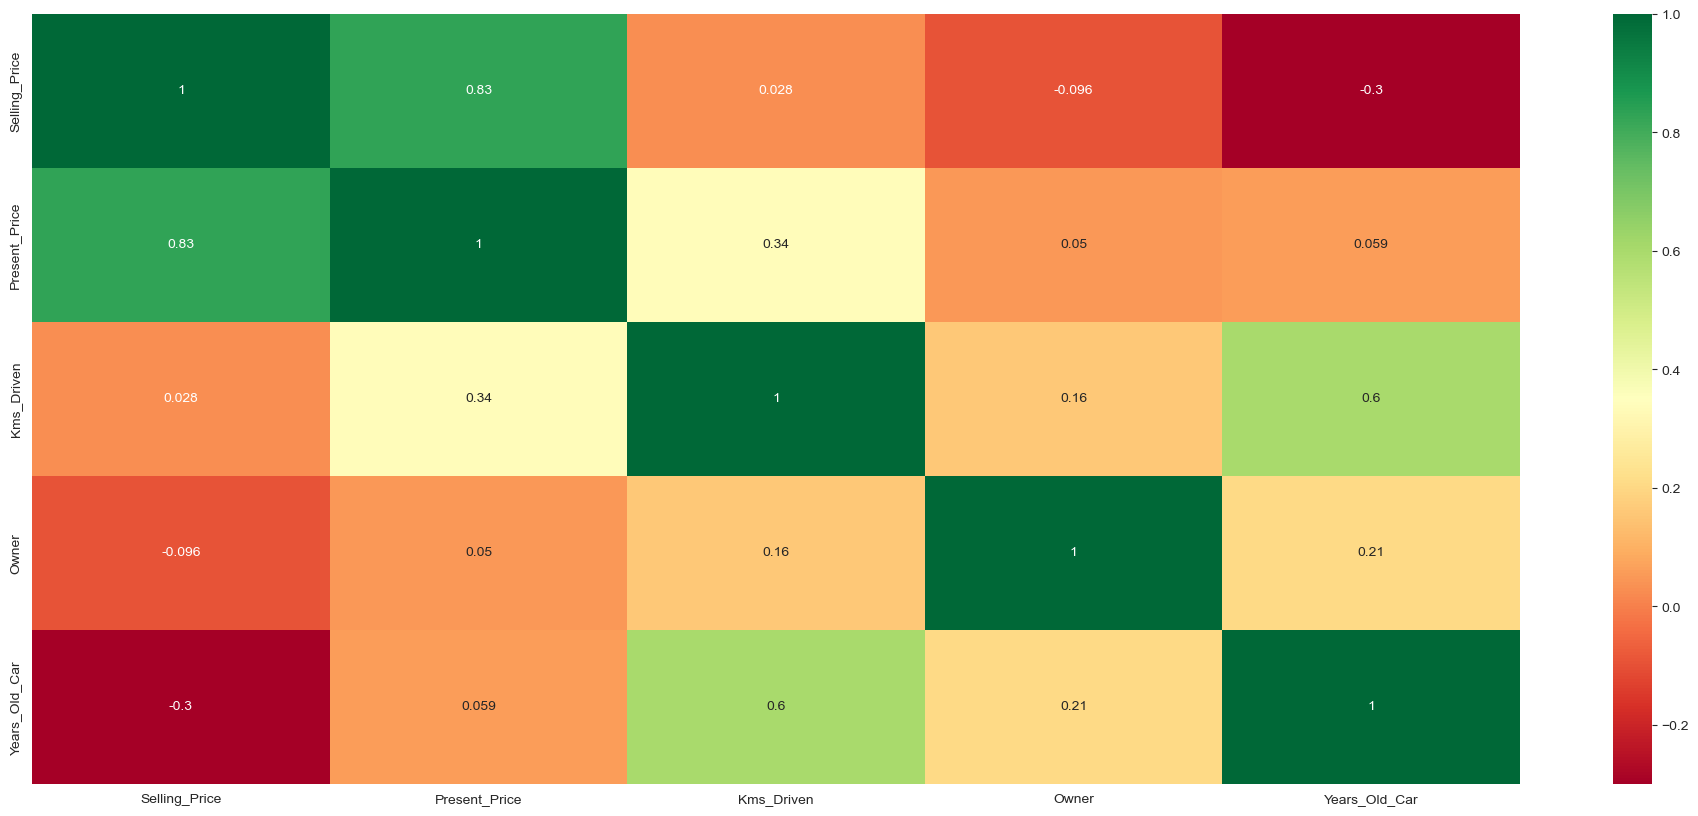

In [50]:
corrmat = final_carset.corr()

print("Find most important features relative to Price-target")
print(corrmat.Selling_Price.sort_values(ascending=False))


# Heatmap: Heatmaps are used to observe the correlations among the feature variables.
plt.figure(figsize = (24,10))
sns.heatmap(corrmat, annot=True, cmap='RdYlGn')

###### From the Correlation Matrix we get the following information:
- We can see Present_Price and Selling_Price are highly correlated. 
- Here, darker green color says that it is highly positively correlated. And red color means negatively correlated. We can see Years_Old_Car and Selling Price are negatively correlated.


### Feature Encoding:

We can see that this dataset has a few categorical columns. We had to convert those categorical data into numerical data since machine learning algorithms cannot process categorical data. This process is called encoding and there are many ways to do this like labelencoding, ordinalencoding, one-hot encoding.

I prefer to use one-hot Encoding over label encoding because there aren't many unique values in the categorical feature.
###### first did label encoding, it was easy to see actually which option has higher impact so thought its better to use one-hot encoding which helps to read data easily on coeffient analysis.

In [51]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(final_carset[['Fuel_Type']])

OneHotEncoder()

In [52]:
# first going with fuel_type
fuel_type_encoded = encoder.transform(final_carset[['Fuel_Type']])

df_fuel_type_encoded = pd.DataFrame(fuel_type_encoded.toarray(), columns = encoder.get_feature_names_out(['Fuel_Type']))

final_carset.reset_index(drop=True, inplace=True)
final_carset = pd.concat([final_carset, df_fuel_type_encoded], axis=1).drop(['Fuel_Type'], axis =1)


In [53]:
er = OneHotEncoder()
er.fit(final_carset[['Transmission']])

seller_type_encoded = er.transform(final_carset[['Transmission']])

df_seller_type_encoded = pd.DataFrame(seller_type_encoded.toarray(), columns = er.get_feature_names_out(['Transmission']))

final_carset.reset_index(drop=True, inplace=True)
final_carset = pd.concat([final_carset, df_seller_type_encoded], axis=1).drop(['Transmission'], axis =1)

In [54]:
er = OneHotEncoder()
er.fit(final_carset[['Seller_Type']])

seller_type_encoded = er.transform(final_carset[['Seller_Type']])

df_seller_type_encoded = pd.DataFrame(seller_type_encoded.toarray(), columns = er.get_feature_names_out(['Seller_Type']))

final_carset.reset_index(drop=True, inplace=True)
final_carset = pd.concat([final_carset, df_seller_type_encoded], axis=1).drop(['Seller_Type'], axis =1)

So, after applying this on all categorical columns, the result was this:

In [55]:
final_carset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old_Car,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual
0,3.35,5.59,27000,0,9,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,4.75,9.54,43000,0,10,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,7.25,9.85,6900,0,6,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,2.85,4.15,5200,0,12,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,4.60,6.87,42450,0,9,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [56]:
# checking once again after using encoding dtypes if all of them are in numeric format.

final_carset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           286 non-null    float64
 1   Present_Price           286 non-null    float64
 2   Kms_Driven              286 non-null    int64  
 3   Owner                   286 non-null    int64  
 4   Years_Old_Car           286 non-null    int64  
 5   Fuel_Type_CNG           286 non-null    float64
 6   Fuel_Type_Diesel        286 non-null    float64
 7   Fuel_Type_Petrol        286 non-null    float64
 8   Transmission_Automatic  286 non-null    float64
 9   Transmission_Manual     286 non-null    float64
 10  Seller_Type_Dealer      286 non-null    float64
 11  Seller_Type_Individual  286 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 26.9 KB


Now, the best part of the project we all are waiting for.

### Regression model Creation:

##### Feature Selection and Scaling

Next, we will select features that affect 'selling_price' the most where we can define our independent variables (input) and the dependent variable (output).

I have selected all the features except carname as its effect on 'selling_price is very less(concluded from the above EDA charts above). These features will form our 'X' variable while selling_price will be our 'y' variable which we are trying to predict.

In [57]:
# Feature selection, setting up independent variables and dependent variable.

X = final_carset.drop(['Selling_Price'],axis=1)
y = final_carset['Selling_Price']

Splitting data into a training set and a test set:
The training set (X_train, y_train) is the proportion of the data (typically 80%) which the model will use to create the relationship between the input and output data.

The testing set (X_test, y_test) is the unseen proportion of the data (typically 25%) which can be used to assess the performance of the model.
Here, I splitted the data into 75% train data set and 25% test data set.

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

print("Shape of the x_train: ", X_train.shape)
print("Shape of the x_test: ", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the x_train:  (214, 11)
Shape of the x_test:  (72, 11)
Shape of y_train: (214,)
Shape of the y_test:  (72,)


In [59]:
# the input features are standardised:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Creating and training the model

In [60]:
# Initalise the LinearRegression object.
lm = LinearRegression()

# Now take the training set and use it to fit the model (i.e., train the model):
lm.fit(X_train_scaled, y_train)

LinearRegression()

### Model results

###### Interpreting coefficient of each input variables.

The coefficient can be interpreted as the change in car selling price given the corresponding variable increase by 1 unit with all other variables staying the same.

We are interested in examining the relationship between the predictor variables and the response variable to find out if increase in features variables actually have a meaningful impact on car selling price.

In [61]:
# let's run a regression analysis.

lm.coef_

array([ 2.68814295, -0.55991938, -0.15936618, -0.85399638, -0.12585716,
        0.33969759, -0.30244697,  0.03818182, -0.03818182,  0.2401035 ,
       -0.2401035 ])

###### Let’s take a look at how to interpret each regression coefficient.

In [62]:
coefficient_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient']).style.set_properties(**{"background-color":"black","color":"green"})
coefficient_df

,coefficient
Present_Price,2.688143
Kms_Driven,-0.559919
Owner,-0.159366
Years_Old_Car,-0.853996
Fuel_Type_CNG,-0.125857
Fuel_Type_Diesel,0.339698
Fuel_Type_Petrol,-0.302447
Transmission_Automatic,0.038182
Transmission_Manual,-0.038182
Seller_Type_Dealer,0.240104


###### Observations:

I will explain the weights what I have got. 
##### positive_weights = if feature value increases, the price will be increase  as the same time.
##### negative_weights = if feature value increases, but the price will decrease here.


- If the age in years increases by each year then the value of car selling price drops by -8539.
- So having fuel_type_diesel in the car is associated with an increase in the selling price of the car. 
- Having an transmission car is also associated with increase in selling price, where as manual transmission means drop in price.
    - Just assumption automatic transmission car is expensive may be its more likely that there is other thing in addition with that automatic that makes that car more of luxury vechile that we dont have visibilty on in the data there might be leather seats for example or there might be especially nice stereo system or something like that may be it has other features like leather seats.
- For each unit(km) increase in kms_driven, selling price decreases value by about -0.55.
- If the car is individual dealer then selling price of car is usually less because individual doesnot add much margin I guess.
- If Seller Type is Dealer, selling price is predicted to increase by 0.24.

### Plotting coeff values on barplot

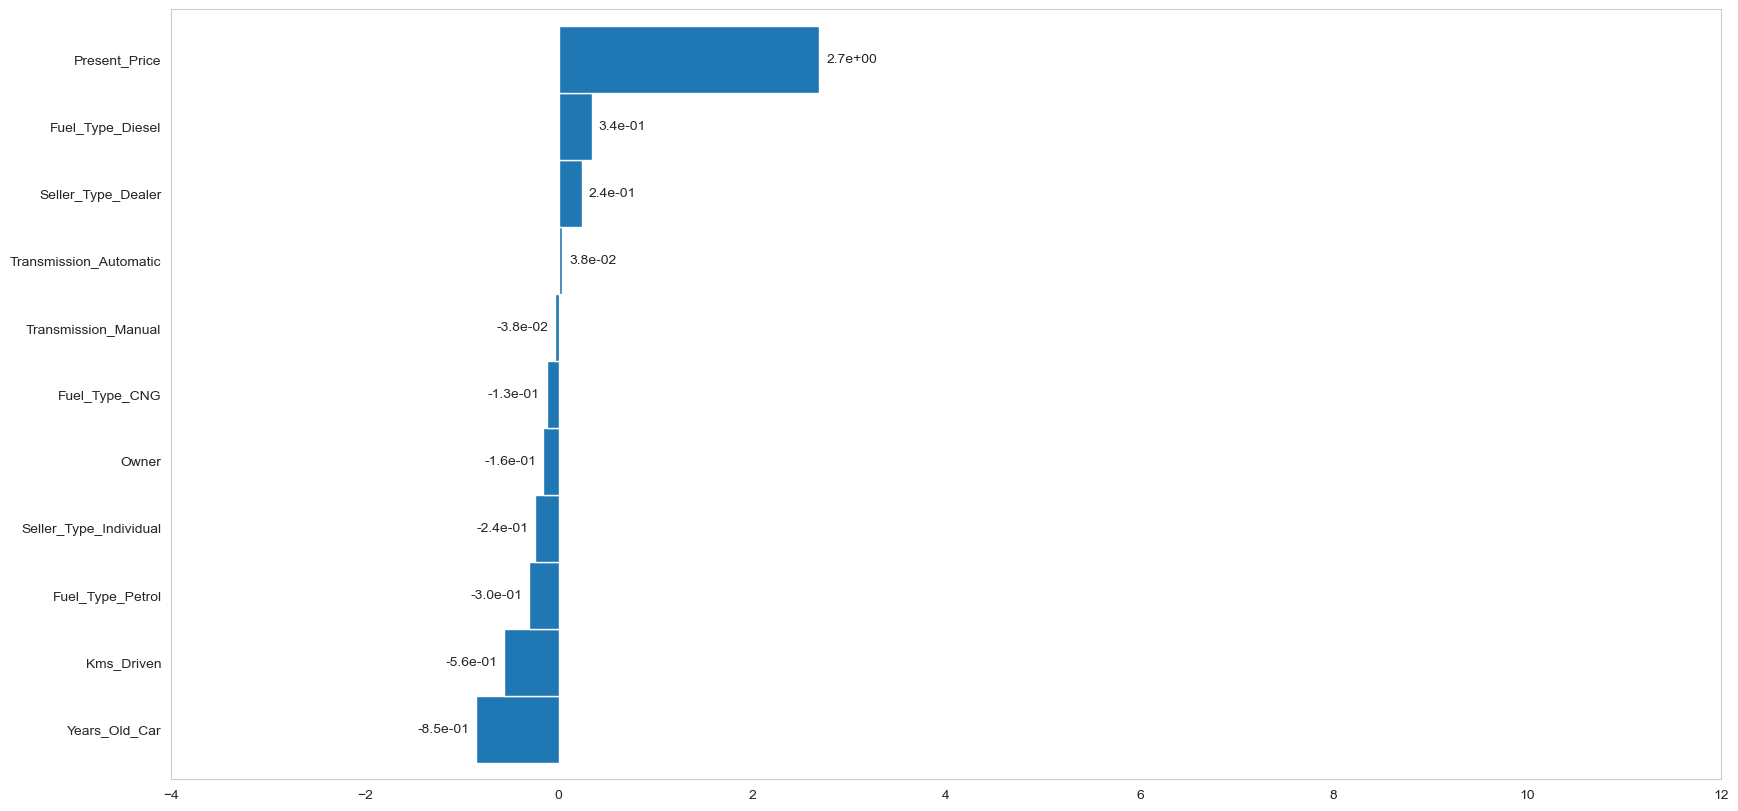

In [63]:
coeff = pd.Series(lm.coef_, X.columns).sort_values()

fig, ax = plt.subplots(1, 1, figsize=[20, 10])

coeff.plot(ax=ax, kind="barh", width=1)
ax.bar_label(ax.containers[0], fmt="%.1e", padding=5)
ax.set_xlim(-4, 12)
ax.grid()

- From the linear regression coefficients bar plot above, we can see that the feature that has the largest impact on the linear regression (because it has the largest coefficient absolute value) is the "Transmission and Fuel_Type_Diesel".

### Features importance, to understand important features

In [64]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X_train_scaled,y_train)

ExtraTreesRegressor()

In [65]:
print(model.feature_importances_)

[3.70607173e-01 4.01785385e-02 4.23464384e-04 1.46248913e-01
 3.01993792e-04 1.96564518e-02 8.94586785e-03 1.34079585e-02
 1.19881856e-02 3.85096314e-01 3.14513944e-03]


#### Plot graph of feature importances for better visualization, taking top5 only

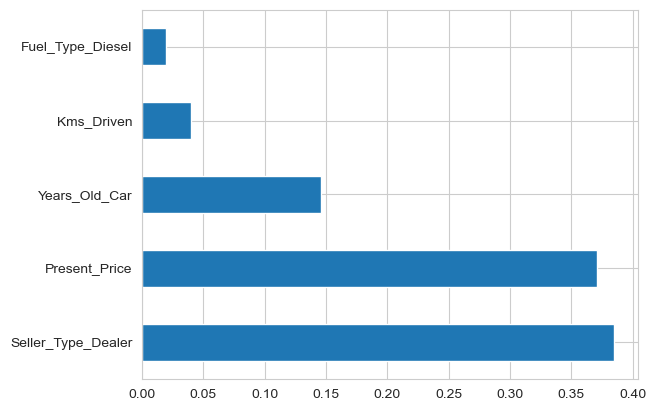

In [66]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

- Observations: Here we can see present_price is the most importance features along with fuel_type_diesel, seller_type_dealer, years_old_driven. These 5 are all important feature.

#### Evaluating the model

To evaluate how accurate the model’s prediction of the y-intercept and coefficients is, we can use the unseen testing set.

Using the trained mode, we can feed in X_test_scaled to get predictions for the resulting car selling prices.

In [67]:
predictions = lm.predict(X_test_scaled)

Text(0.5, 1.0, 'Actual vs Predicted Price for Testing data')

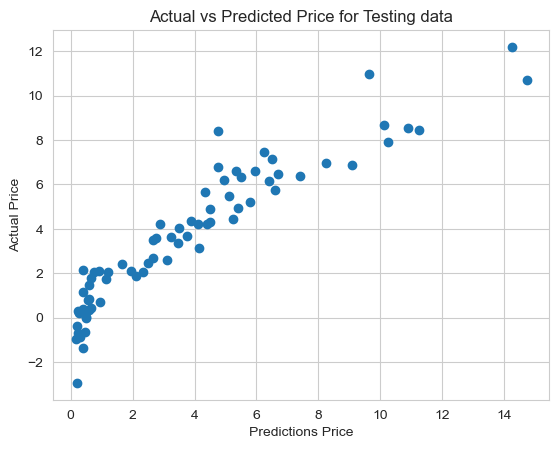

In [68]:
plt.scatter(y_test, predictions)
plt.xlabel('Predictions Price')
plt.ylabel('Actual Price')
plt.title('Actual vs Predicted Price for Testing data')

#### Model evaluation metrics

In linear regression, we calculate loss functions to measure the discrepancy between the predicted values and the actual values of the target variable. The primary objective of linear regression is to find the best-fitting line that minimizes the difference between the predicted values and the true values.

Loss functions quantify the error or the "loss" of the model's predictions. By calculating the loss, we can evaluate how well the linear regression model is performing and determine the optimal parameters (slope and intercept) for the line that minimizes the error.

In [69]:
print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Accuracy on Training set   : ', lm.score(X_train_scaled,y_train))
print('Accuracy on Testing set  : ', lm.score(X_test_scaled,y_test))

		Error Table
Mean Absolute Error      :  0.9220594393346393
Mean Squared  Error      :  1.5653272453669425
Root Mean Squared  Error :  1.2511303870368358
Accuracy on Training set   :  0.845687121012656
Accuracy on Testing set  :  0.8709578034525671


In [70]:
# creating a dataframe to compare the result and prediction

df_eval = pd.DataFrame({'Selling_Price':y_test,'Predicted_Price':predictions}) 
df_eval.head(5)

,Selling_Price,Predicted_Price
209,5.11,5.467943
255,4.10,4.210287
205,3.50,4.021329
264,6.25,7.473349
112,0.90,2.082513


In [71]:
df_eval['Residual'] = df_eval['Selling_Price'] - df_eval['Predicted_Price']
df_eval['Difference%'] = np.absolute(df_eval['Residual']/ df_eval['Selling_Price']*100)

#setting all value two digits after dot.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

# checking performance
df_eval

,Selling_Price,Predicted_Price,Residual,Difference%
209,5.11,5.47,-0.36,7.00
255,4.10,4.21,-0.11,2.69
205,3.50,4.02,-0.52,14.90
264,6.25,7.47,-1.22,19.57
112,0.90,2.08,-1.18,131.39
...,...,...,...,...
31,2.35,2.05,0.30,12.89
237,5.40,4.95,0.45,8.42
52,4.75,8.41,-3.66,76.96
26,4.15,3.13,1.02,24.61


- Here, higher difference is on the lower price car. As i can see the residual negative means the model is predicted far away from the original value. 

In [72]:
df_eval.describe()

,Selling_Price,Predicted_Price,Residual,Difference%
count,72.00,72.00,72.00,72.00
mean,3.80,3.69,0.11,92.42
std,3.51,3.24,1.26,217.34
min,0.16,-2.94,-3.66,0.64
25%,0.60,1.08,-0.76,11.64
50%,3.17,3.54,0.07,24.22
75%,5.43,6.23,0.63,47.96
max,14.73,12.19,4.02,1569.64


There is a visible difference between the actual car price listed and the predicted price by Linear Regression model since the accuracy of the model is just 84%, so not satisfied with this accuracy, hence we decided for a different model.

##### The model has performed an accuracy of 84% . We weren't satisfied with this accuracy, hence we decided for a different model.

Now, I will go with base models then I will go for hyperparameter tuning.

In [73]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Training set','Accuracy on Testing set'])

In [74]:
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor', GradientBoostingRegressor()],
              
             ]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train_scaled,y_train)
    ATeS = model.score(X_test_scaled,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Training set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

###### Result Comparison

In [75]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Training set,Accuracy on Testing set
3,AdaBoostRegressor,1.00,0.96,0.92
0,DecisionTreeRegressor,0.89,1.00,0.93
1,XGBRegressor,0.73,1.00,0.96
4,GradientBoostingRegressor,0.68,0.99,0.96
2,RandomForestRegressor,0.66,0.99,0.96


As per the above bar table, RandomForestRegressor has the lowest RMSE loss value, followed by XGBRegressor with not much difference. Yes! Our RandomForest model does perform well.

So, we conclude that the model which predicts the car prices pretty well are Gradient Boosting Regressor and Random Forest Regressor.

From above table, I decided go with Random Forrest Regressor Model and GradientBoostingRegressor. Because This model performed better in terms of train as well as test prediction accuracy.

But, here I will also apply parameters like this:

n_estimators = 100 --> The number of trees that the model will use. I gave 100 as the parameter value to n_estimators.
max_Depth = 25 --> The maximum depth of the tree. We gave 25 as the parameter value to max_depth.

In [76]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=33)
RandomForestRegressorModel.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train_scaled, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test_scaled, y_test))
print('----------------------------------------------------')


Random Forest Regressor Train Score is :  0.9884652309935964
Random Forest Regressor Test Score is :  0.9626657720282459
----------------------------------------------------


Yes! Our RandomForest model does perform well — RMSE of 68. Now, we will try with some boosting algorithms such as Gradient Boosting

In [77]:
gbr = GradientBoostingRegressor(random_state=21, n_estimators=3000)
gbr.fit(X_train_scaled, y_train)

print('Random Forest Regressor Train Score is : ' , gbr.score(X_train_scaled, y_train))
print('Random Forest Regressor Test Score is : ' , gbr.score(X_test_scaled, y_test))
print('----------------------------------------------------')

Random Forest Regressor Train Score is :  0.9999999979354619
Random Forest Regressor Test Score is :  0.9576358430651183
----------------------------------------------------


Even this seem to perform well.

#### By using parameter we can see the improvement over Regression Model's Accuracy.


We were able to achieve around 96% accuracy on test data.

In [78]:
final = pd.DataFrame({'Selling_Price':y_test,'Predicted_Price':y_pred}) 
final.head(5)

,Selling_Price,Predicted_Price
209,5.11,5.35
255,4.10,4.43
205,3.50,2.97
264,6.25,7.92
112,0.90,0.81


We can observe that there very little visible difference between the actual price of the car listed and the predicted price of the car, predicted by Random Forest Regressor Model, since it is 96.56% accurate.

Text(0.5, 1.0, 'Actual vs Predicted Price for Testing data')

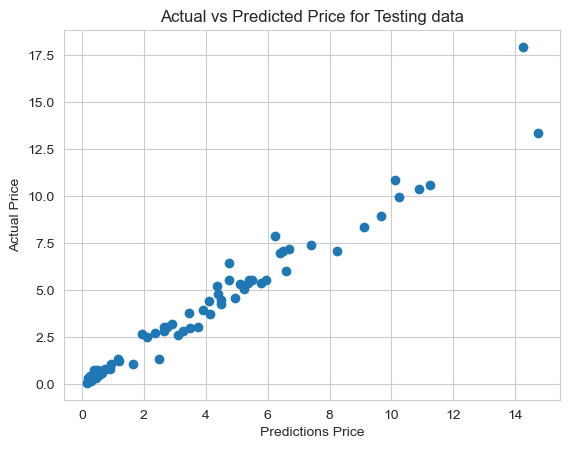

In [79]:
plt.scatter(y_test, y_pred)
plt.xlabel('Predictions Price')
plt.ylabel('Actual Price')
plt.title('Actual vs Predicted Price for Testing data')

In [115]:
'''fig, ax = plt.subplots(1, 1, figsize=[6, 4])

ax.plot(y_test, y_pred, label="predictions", linestyle="", marker=".", alpha=0.7)

ax.plot([50, 90], [50, 90], label="y_pred = y_test", color="k", alpha=0.4)

ax.set_xlabel("y_test = Actual life expectancy")
ax.set_ylabel("y_pred = Predicted life expectancy")
ax.legend()
ax.grid()
'''

'fig, ax = plt.subplots(1, 1, figsize=[6, 4])\n\nax.plot(y_test, y_pred, label="predictions", linestyle="", marker=".", alpha=0.7)\n\nax.plot([50, 90], [50, 90], label="y_pred = y_test", color="k", alpha=0.4)\n\nax.set_xlabel("y_test = Actual life expectancy")\nax.set_ylabel("y_pred = Predicted life expectancy")\nax.legend()\nax.grid()\n'

#### CONCLUSION

In linear Regression Model was successfully implemented employing various prominent
algorithms from the python libraries and modules. There were no null values but removed duplicate data from the dataset and the categorical variables were also processed using One Hot Encoding technique. The results showed that there is a positive correlation between Selling Price and Present Price while a negative correlation between Selling Price and Kms Driven, Years Used and Owner (Number of Previous Owners).

Positive correlation can be referred to as Direct proportion while Negative correlation can be referred to as Inverse Proportion. Also, it was concluded that Selling Price of cars was higher when sold by dealers when compared to individuals. Similarly, the Selling Price was higher for cars that were automatic in transmission. It was also observed that Selling Price of cars with Fuel Type Diesel was higher than those having Petrol and CNG as Fuel Type.


This Notebook evaluates used-car price prediction from cardekho dataset which gives the best accuracy of 95% for test data and 98% for train-data. Being a sophisticated model, GradientBoostingRegressor gives the BEST accuracy in comparison to all prior works using these datasets.

An efficient machine learning model is built by training, testing, and evaluating three machine learning regressors named Random Forest Regressor, Linear Regression, and Bagging Regressor. As a result of pre-processing and transformation, Random Forest Regressor came out on top with 96% accuracy followed by Bagging Regressor with 95%.

### Future Works

Will apply Hyper Parameter Tuning in future or may be use gridcv if I had time. It would have improved the machine learning model accuracy. Soon will apply Hyper Parameter Tuning concepts with others parameters in some other project.